<a href="https://colab.research.google.com/github/bmijangos/ProyectoIntegrador/blob/main/Actividad1_equipo21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tecnológico de Monterrey**

# **Proyecto Integrador**
## Avance 1
## Análisis exploratorio de datos
###Dra. Grettel Barceló Alonso
###EQUIPO 21
###Bernardo Mijango Flores - A01793654
###Dalia Isabel López Tapia - A01245026
###David Valles Canedo - A01191310
5 de mayo de 2024

In [1]:
# conectamos al drive de google para la lectura de los archivos csv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns   # para un mejor despliegue de los gráficos
from sklearn.cluster import KMeans
from scipy import stats
from scipy.stats import pearsonr

In [8]:

# Lectura de los archivos csv
file_path = '/content/drive/MyDrive/DataSetProyecto/GrupalTodo.csv'

label = ["IdCliente","FechaAltaCliente","CodigoGrupo","EdadCliente","Genero","EstadoCivil","Escolaridad","CapacidadPago","Localidad","CodigoSucursal","CodigoASesor","NumeroCredito","CicloCliente","FechaDesembolso","FechaVencimiento","FechaCancelacion","Plazo","PeriodoPago","EstatusCredito","MontoCredito","CuotaNumero","CuotaFechaVencimiento","CuotaFechaCancelacion","MontoCuota","MontoCapital","SaldoCapital","EstatusCuota","DiasAtraso"]

# Obtenemos el dataframe
pagos_df = pd.read_csv(file_path, names=label)

pagos_df.shape


(4254537, 28)

In [9]:
# Agregamos los datos del segundo archivo de castigos
file_path = '/content/drive/MyDrive/DataSetProyecto/GrupalTodoCastigos.csv'

castigos_df = pd.read_csv(file_path)

castigos_df.shape

(127677, 28)

In [10]:
# unimos los dos dataframes en uno solo
grupal_df = pd.concat([pagos_df, castigos_df], axis=0)

In [6]:
grupal_df.shape

(4382214, 28)

¿Hay valores faltantes en el conjunto de datos?
Si existen valores nulos los cuales representan menos del 0.01 porciento del total de la base de datos por lo que se decide eliminar

¿Se pueden identificar patrones de ausencia?
Se decide eliminar los registros faltantes por no ser representativo para la muestra


In [7]:
grupal_df.isnull().values.any()

True

In [8]:
grupal_df.isnull().sum()

IdCliente                   0
FechaAltaCliente            0
CodigoGrupo                 0
EdadCliente                 0
Genero                      0
EstadoCivil                 0
Escolaridad              1243
CapacidadPago               0
Localidad                   0
CodigoSucursal              0
CodigoASesor                0
NumeroCredito               0
CicloCliente                0
FechaDesembolso             0
FechaVencimiento            0
FechaCancelacion            0
Plazo                       0
PeriodoPago                 0
EstatusCredito              0
MontoCredito                0
CuotaNumero                 0
CuotaFechaVencimiento       0
CuotaFechaCancelacion     128
MontoCuota                  0
MontoCapital                0
SaldoCapital                0
EstatusCuota                0
DiasAtraso                128
dtype: int64

In [11]:
# eliminamos los valores nulos
gpdf = grupal_df.dropna()

In [12]:
gpdf.isnull().values.any()

False

¿Cuáles son las estadísticas resumidas del conjunto de datos?

In [11]:
print(gpdf.describe(exclude=[object]))

          IdCliente   CodigoGrupo   EdadCliente   EstadoCivil  CapacidadPago  \
count  4.380844e+06  4.380844e+06  4.380844e+06  4.380844e+06   4.380844e+06   
mean   5.902005e+04  8.415457e+02  4.615864e+01  3.268472e+00   7.633413e+03   
std    3.836093e+04  5.770191e+02  1.334739e+01  1.669057e+00   3.069242e+04   
min    4.000000e+00  0.000000e+00  1.900000e+01  1.000000e+00  -6.391200e+06   
25%    2.367200e+04  3.130000e+02  3.600000e+01  2.000000e+00   2.400000e+03   
50%    5.530600e+04  8.230000e+02  4.500000e+01  3.000000e+00   6.000000e+03   
75%    9.229100e+04  1.244000e+03  5.500000e+01  5.000000e+00   1.017600e+04   
max    1.376940e+05  2.594000e+03  1.130000e+02  7.000000e+00   8.000400e+06   

          Localidad  CodigoSucursal  NumeroCredito  CicloCliente  \
count  4.380844e+06    4.380844e+06   4.380844e+06  4.380844e+06   
mean   7.607020e+03    6.142390e+00   6.143053e+09  5.265920e+00   
std    3.124029e+03    4.096959e+00   4.096748e+09  4.991101e+00   
min    

In [12]:
print(gpdf.Genero.describe())
print(gpdf.Escolaridad.describe())
print(gpdf.PeriodoPago.describe())
print(gpdf.EstatusCredito.describe())

count     4380844
unique          2
top             F
freq      4378507
Name: Genero, dtype: object
count     4380844
unique         14
top            1A
freq      1302653
Name: Escolaridad, dtype: object
count          4380844
unique               3
top       CATORCENA(S)
freq           3816897
Name: PeriodoPago, dtype: object
count     4380844
unique          2
top           CAN
freq      4253254
Name: EstatusCredito, dtype: object


In [13]:
gpdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380844 entries, 0 to 127676
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   IdCliente              int64  
 1   FechaAltaCliente       object 
 2   CodigoGrupo            int64  
 3   EdadCliente            int64  
 4   Genero                 object 
 5   EstadoCivil            int64  
 6   Escolaridad            object 
 7   CapacidadPago          float64
 8   Localidad              int64  
 9   CodigoSucursal         int64  
 10  CodigoASesor           object 
 11  NumeroCredito          int64  
 12  CicloCliente           int64  
 13  FechaDesembolso        object 
 14  FechaVencimiento       object 
 15  FechaCancelacion       object 
 16  Plazo                  int64  
 17  PeriodoPago            object 
 18  EstatusCredito         object 
 19  MontoCredito           float64
 20  CuotaNumero            int64  
 21  CuotaFechaVencimiento  object 
 22  CuotaFechaCancelacion  o

In [14]:
print(gpdf.head())

   IdCliente         FechaAltaCliente  CodigoGrupo  EdadCliente Genero  \
0        261  2004-02-16 00:00:00.000           56           40      F   
1      30654  2004-02-01 00:00:00.000         1223           65      F   
2        264  2004-02-16 00:00:00.000           57           68      F   
3        263  2004-02-16 00:00:00.000           56           71      F   
4        261  2004-02-16 00:00:00.000           56           40      F   

   EstadoCivil Escolaridad  CapacidadPago  Localidad  CodigoSucursal  ...  \
0            2          1A            0.0       7181               1  ...   
1            3          7A            0.0       7086               1  ...   
2            5          7A            0.0       7181               1  ...   
3            5          7A            0.0       7181               1  ...   
4            2          1A            0.0       7181               1  ...   

  EstatusCredito  MontoCredito  CuotaNumero    CuotaFechaVencimiento  \
0            CAN    

¿Hay valores atípicos en el conjunto de datos?

Se detecto que la variable "EdadCliente" hay datos atipicos con mas de 80 años, esto se debe que al momento de la consulta de la informacion se obtuvo el dato comparando la fecha de nacimiento con la fecha actual, cuando se debio tomar la fecha del desembolso que es el dato mas real, para continuar con la exploracion de los datos se procede a eliminar dichos registros.

In [13]:
# se eliminar los registros de clientes con mas de 80 años

gpdf.drop( gpdf[gpdf['EdadCliente'] > 80].index, axis=0, inplace=True)

<ipython-input-13-a779e5281e75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpdf.drop( gpdf[gpdf['EdadCliente'] > 80].index, axis=0, inplace=True)


In [14]:
# analisis de las siguientes variables
newgpdf = gpdf[['IdCliente','EdadCliente','CicloCliente','Plazo','MontoCuota','DiasAtraso','EstadoCivil','EstatusCredito']]

newgpdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4334903 entries, 13 to 127676
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   IdCliente       int64  
 1   EdadCliente     int64  
 2   CicloCliente    int64  
 3   Plazo           int64  
 4   MontoCuota      float64
 5   DiasAtraso      float64
 6   EstadoCivil     int64  
 7   EstatusCredito  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 297.7+ MB


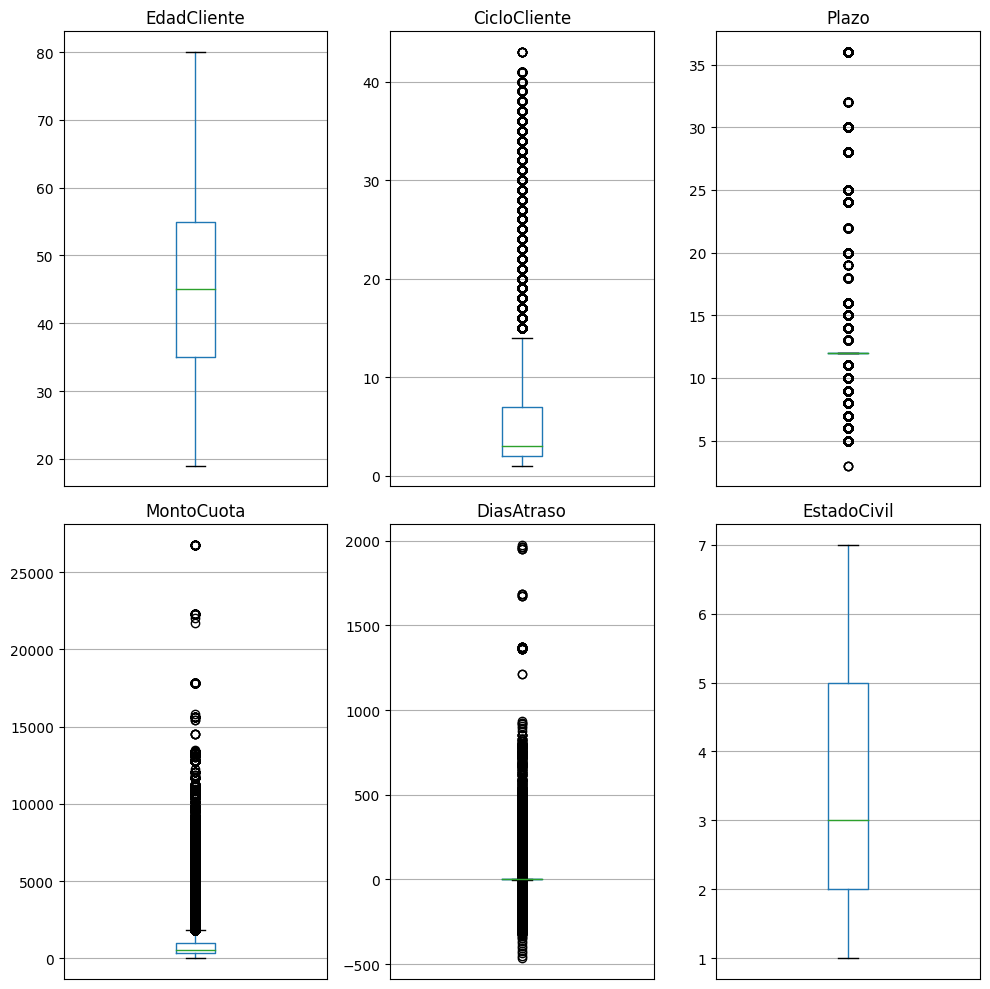

In [18]:
# graficamos para revisar valores atipicos
df = pd.DataFrame(gpdf[['EdadCliente','CicloCliente','Plazo','MontoCuota','DiasAtraso','EstadoCivil','EstatusCredito']])

fig, axes = plt.subplots(2, 3, figsize=(10, 10))  # Definimos una ventana de 3x3 nichos para incluir en cada uno de ellos un gráfico.

# Iterar sobre las columnas y generar un gráfico de caja para cada una
for k, ax in zip(range(0, 6), axes.flatten()):  # Usamos zip para iterar sobre los ejes y los índices
    df.boxplot(column=df.columns[k], ax=ax)  # Generar el gráfico de caja para la columna actual
    ax.set_title(df.columns[k])  # Establecer el título del gráfico
    ax.set_xticks([])  # Eliminar las etiquetas del eje x para mayor claridad

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()


<ipython-input-22-3e988d53e7f7>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,k+1)     # Los nichos para cada histograma se numeran iniciando en 1.


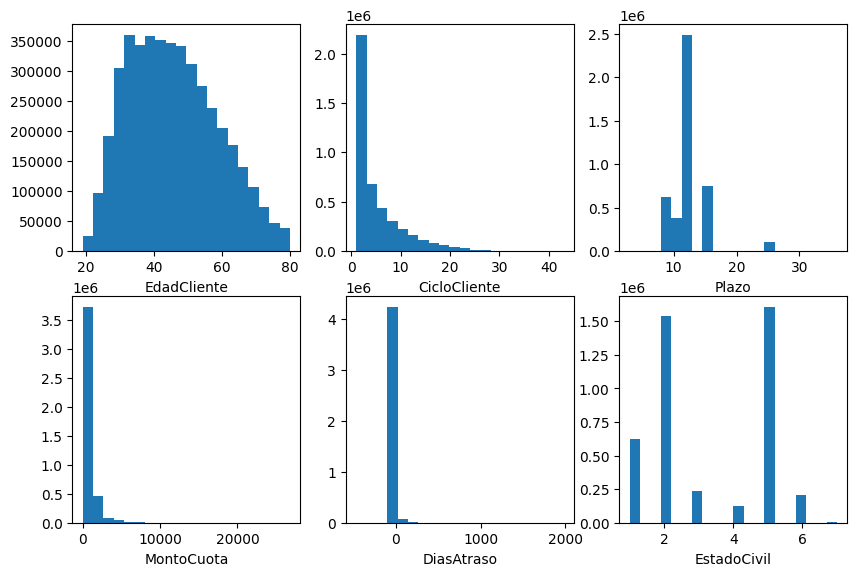

In [22]:
df = pd.DataFrame(gpdf[['EdadCliente','CicloCliente','Plazo','MontoCuota','DiasAtraso','EstadoCivil','EstatusCredito']])

fig, axes = plt.subplots(2, 3, figsize=(10, 10))  # Definimos una ventana de 3x3 nichos para incluir en cada uno de ellos un gráfico.

for k in range(0,6):
  plt.subplot(3,3,k+1)     # Los nichos para cada histograma se numeran iniciando en 1.
  plt.hist(df[df.columns[k]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(df.columns[k])
plt.show()



¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

Lo que se observa en estos histogramas en primer lugar es que los valores sobre el eje horizontal de estas seis variables numericas varían desde las unidades, hasta los miles; los histogramas de ClicloCliente, MontoCuota y DiasAtraso tienen un sesgo positivo; la variable EdadCliente tiene una distribución normal a excepcion de la variable EstadoCivil que por ser una variable de tipo categorica proporciona una distribucion muy sesgada

<ipython-input-28-d84ebc8bbce2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpdf['FechaDesembolso'] = pd.to_datetime(gpdf['FechaDesembolso'])


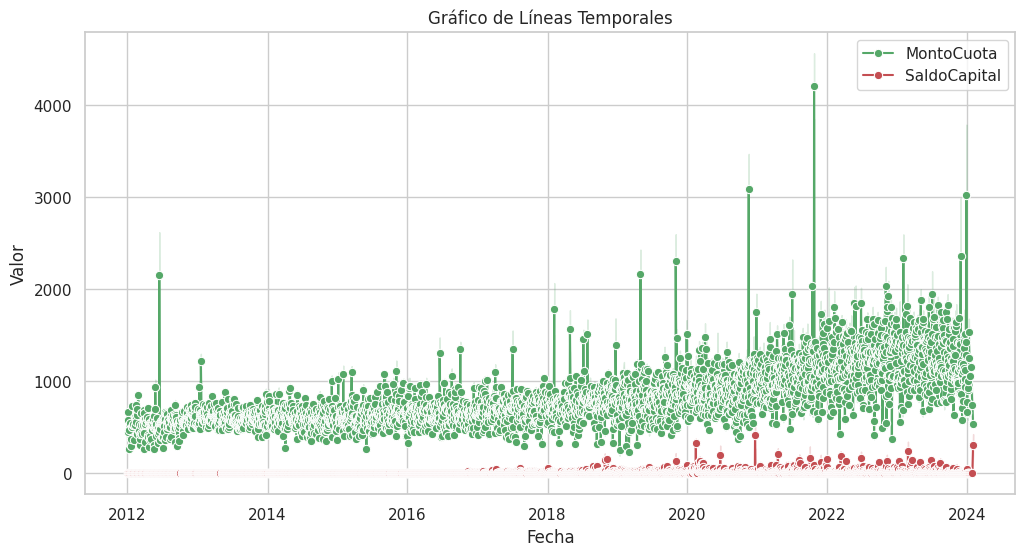

In [28]:
# Obtenemos la columna 'FechaDesembolso' en formato datetime
gpdf['FechaDesembolso'] = pd.to_datetime(gpdf['FechaDesembolso'])

# Configura el estilo de los gráficos (opcional)
sns.set(style="whitegrid")

# Crea el gráfico de líneas para 'MontoCredito'
plt.figure(figsize=(12, 6))
#sns.lineplot(x='FechaDesembolso', y='MontoCredito', data=gpdf, marker='o', linestyle='-', label='MontoCredito', color='b')

# Añade líneas para otras columnas ('MontoCuota', 'SaldoCapital')
sns.lineplot(x='FechaDesembolso', y='MontoCuota', data=gpdf, marker='o', linestyle='-', label='MontoCuota', color='g')
sns.lineplot(x='FechaDesembolso', y='SaldoCapital', data=gpdf, marker='o', linestyle='-', label='SaldoCapital', color='r')

# Personaliza el gráfico
plt.title('Gráfico de Líneas Temporales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()  # Muestra la leyenda con etiquetas de las líneas
plt.grid(True)

# Muestra el gráfico
plt.show()


¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).

Se puede apreciar un incremento en a partir del 2018 en adelante, es muy sutil determinar el efecto por pandemia en el 2020 que es donde se existe un incremento de saldos pendientes de pago que son los castigos

In [34]:
#Para identificar correlación
correlation_matrix = newgpdf.corr(numeric_only=True)

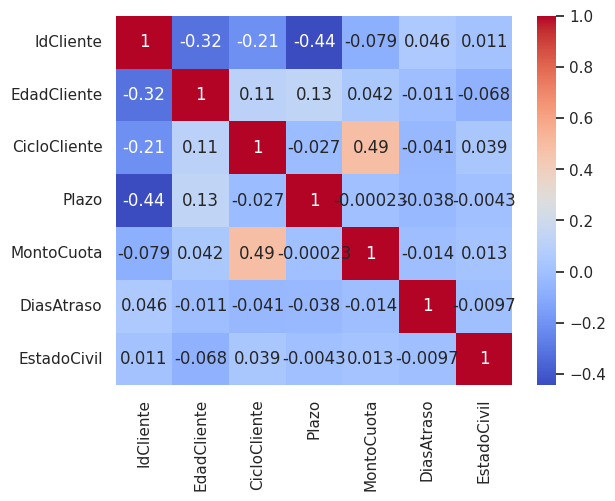

In [35]:
# Mapa de Correlacion
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


¿Hay correlación entre las variables dependientes e independientes?

Existe una correlacion muy baja entre las variables montoCuota y CicloCliente, todas las demas variable tienen una correlacion muy baja o nula, en general no tienen correlaciones

In [53]:
newgpdf.quantile([.1, .25, .5, .75, .90], axis=0, numeric_only=True)


,IdCliente,EdadCliente,CicloCliente,Plazo,MontoCuota,DiasAtraso,EstadoCivil
0.10,8967.0,30.0,1.0,8.0,243.240,0.0,1.0
0.25,23874.0,35.0,2.0,12.0,370.550,0.0,2.0
0.50,55686.0,45.0,3.0,12.0,565.280,0.0,3.0
0.75,92530.0,55.0,7.0,12.0,968.525,1.0,5.0
0.90,113457.0,64.0,12.0,15.0,1599.550,3.0,5.0


¿Cómo se distribuyen los datos en función de diferentes categorías?

Con el siguientes codigo se puede obervar la distribucion de las variables IdCliente, EdadCliente, CicloCliente, Plazo, MontoCuota, DiasAtraso y EstadoCivil a atraves de los percentiles 10, 25, 50, 75 y 90

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-15-188bab0b4fcf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newgpdf['Cluster'] = kmeans.fit_predict(data_for_clustering)


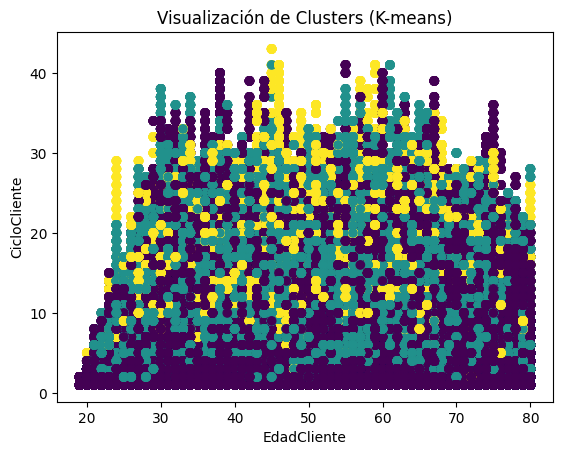

In [15]:
# Seleccionamos las columnas relevantes para el clustering
columns_for_clustering = ['EdadCliente','Plazo','MontoCuota','CicloCliente']

# Los datos relevantes para el clustering
data_for_clustering = newgpdf[columns_for_clustering]

# Aplica K-means
kmeans = KMeans(n_clusters=3)  # número de clusters
newgpdf['Cluster'] = kmeans.fit_predict(data_for_clustering)

# Visualiza los clusters en un gráfico de dispersión 2D
plt.scatter(newgpdf['EdadCliente'], newgpdf['CicloCliente'], c=newgpdf['Cluster'], cmap='viridis')
plt.title('Visualización de Clusters (K-means)')
plt.xlabel('EdadCliente')
plt.ylabel('CicloCliente')
plt.show()


¿Existen patrones o agrupaciones (clusters) en los datos con características similares?

Se puede notar que los datos se agrupan basandose del Ciclo del Cliente y la Edad del cliente por lo que si existen pagrones de agrupacion.

Para determinar el número óptimo de grupos, se tien que seleccionar el valor de k en el "codo" del siguiente grafico, es decir, el punto después del cual la distorsión/inercia comienza a disminuir de forma lineal. Por lo tanto, para los datos otorgados se concluye que el número óptimo de conglomerados para los datos es 3.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

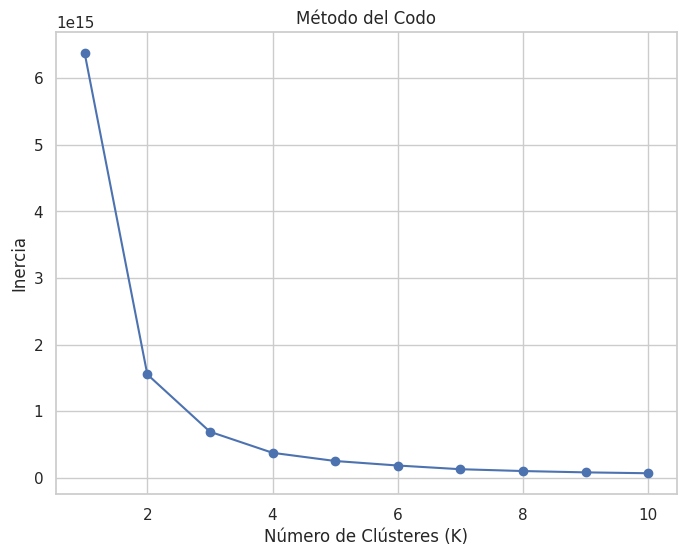

In [60]:
data_for_clustering = newgpdf[['IdCliente','EdadCliente','CicloCliente','Plazo','MontoCuota','DiasAtraso','EstadoCivil']]

# Lista para almacenar las inercias
inertias = []

# Probamos diferentes valores de K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    inertias.append(kmeans.inertia_)

# Graficamos el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia')
plt.show()



¿Se deberían normalizar las imágenes para visualizarlas mejor?




¿Hay desequilibrio en las clases de la variable objetivo?